## Repeat Exploratory Data Analysis (2nd attempt)

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 13
plt.rcParams['font.weight'] = 'normal'
plt.style.use('seaborn-paper')

In [4]:
# Import data set
coverage = pd.read_csv('C:/Users/tohaj/Box/Programming/Data Science/DATA SETS/insurance.csv')

In [5]:
# View first 7 obs
coverage.head(7)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59


In [6]:
# View last 3 obs
coverage.tail(3)

,age,sex,bmi,children,smoker,region,expenses
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [7]:
# Check the data shape and column names

# Shape of the data
print('The insurance data has ' + str(coverage.shape[0]) + ' rows and ' + str(coverage.shape[1]) + ' columns')
#Alternatively:
print('The insurance data has ', coverage.shape[0], ' rows and ', coverage.shape[1], ' columns')

# Column names
print('\nThe columns/variable names in the data are: \n', coverage.columns.values)
#Alternatively:
print('The columns/variable names in the data are: \n' + str(coverage.columns.values))

The insurance data has 1338 rows and 7 columns
The insurance data has  1338  rows and  7  columns

The columns/variable names in the data are: 
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']
The columns/variable names in the data are: 
['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']


In [8]:
# Description
print(coverage.describe())
coverage.info()

               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: floa

Text(0.5, 1.0, 'Linear model of Insurance charges vs. Age')

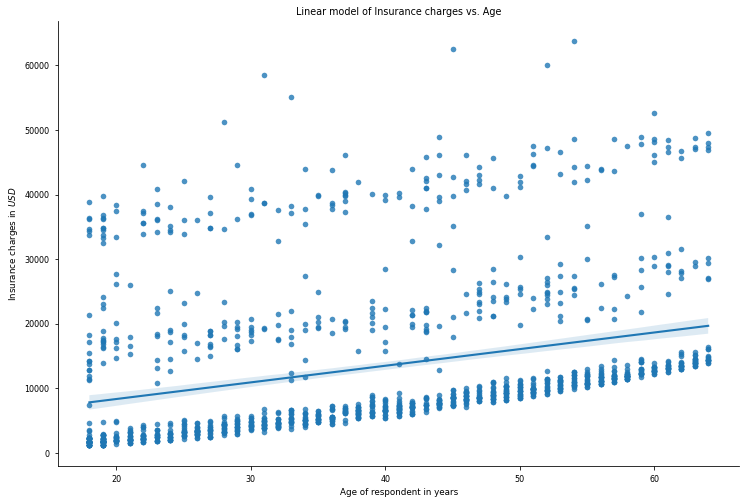

In [9]:
# Plot a linear model of Expenses vs. Age
sns.lmplot(x = 'age', y = 'expenses', data = coverage, aspect = 1.5, height = 7)
plt.xlabel('Age of respondent in years')
plt.ylabel('Insurance charges in $USD$')
plt.title('Linear model of Insurance charges vs. Age')

In [10]:
# Check for missing values in the data
coverage.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


There are no missing values in the data

Text(0.5, 1.0, 'Heatmap of missing values in the insurance data set')

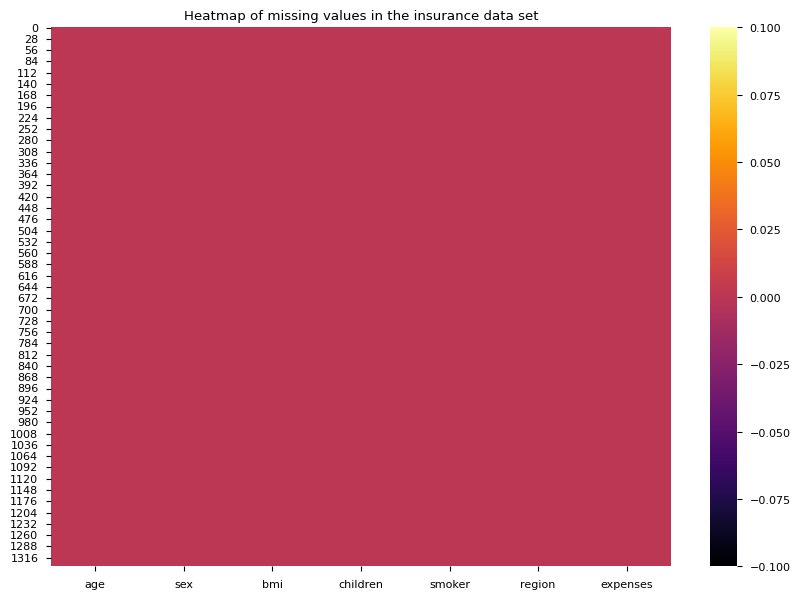

In [18]:
# Create a heatmap of the missing values
plt.figure(figsize = (10, 7))
sns.heatmap(coverage.isnull(), cmap = 'inferno')
plt.title('Heatmap of missing values in the insurance data set')

Text(0.5, 1.0, 'Pairwise correlation of all quant variables in the insurance data')

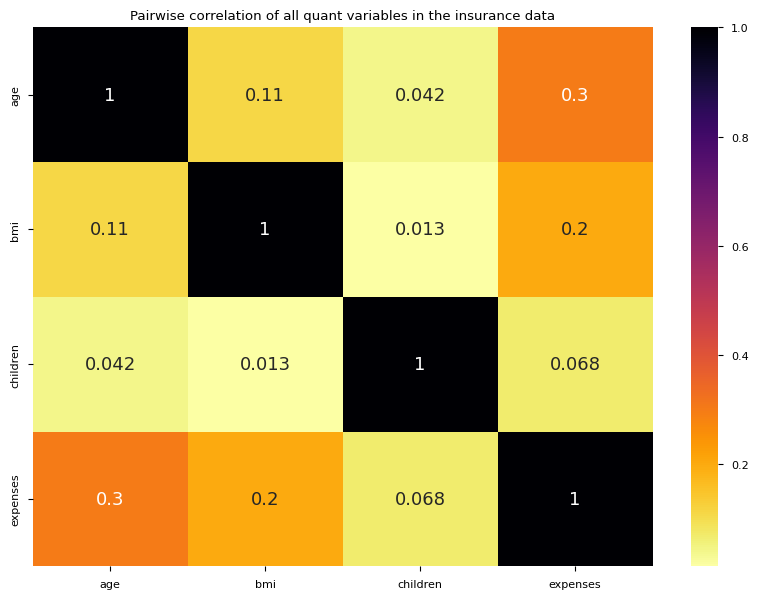

In [17]:
# Create a heatmap showing pairwise correlation of variables in the data set
# Correlation applies to only quantitative variables, so only variables meeting this criteria are included on the heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(coverage.corr(), cmap = 'inferno_r', annot = True)
plt.title('Pairwise correlation of all quant variables in the insurance data')

c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

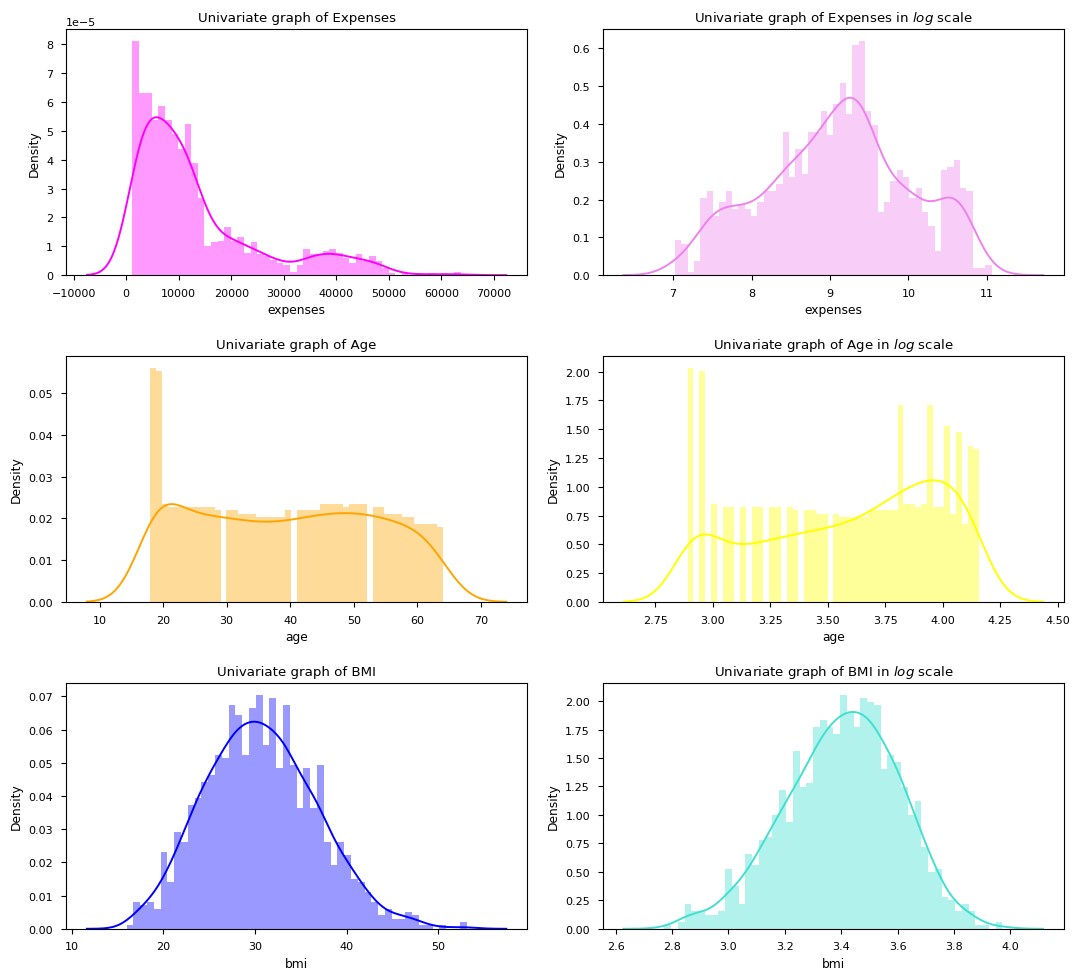

In [31]:
# Plot univariate distributions of Expenses, Age, and BMI
j = plt.figure(figsize = (11, 10))

# Expenses (raw)
ax1 = j.add_subplot(321)
sns.distplot(coverage['expenses'], bins = 50, color = 'magenta', ax = ax1)
ax1.set_title('Univariate graph of Expenses')
# log of Expenses
ax2 = j.add_subplot(322)
sns.distplot(np.log(coverage['expenses']), bins = 50, color = 'violet', ax = ax2)
ax2.set_title('Univariate graph of Expenses in $log$ scale')

# Age (raw)
ax3 = j.add_subplot(323)
sns.distplot(coverage['age'], bins = 50, color = 'orange', ax = ax3)
ax3.set_title('Univariate graph of Age')
# log of Expenses
ax4 = j.add_subplot(324)
sns.distplot(np.log(coverage['age']), bins = 50, color = 'yellow', ax = ax4)
ax4.set_title('Univariate graph of Age in $log$ scale')

# BMI (raw)
ax5 = j.add_subplot(325)
sns.distplot(coverage['bmi'], bins = 50, color = 'blue', ax = ax5)
ax5.set_title('Univariate graph of BMI')
# log of Expenses
ax6 = j.add_subplot(326)
sns.distplot(np.log(coverage['bmi']), bins = 50, color = 'turquoise', ax = ax6)
ax6.set_title('Univariate graph of BMI in $log$ scale')

j.tight_layout()
# burgundy, violet, purple, lilac, onion,...    emerald, orange, mustard, yellow, 

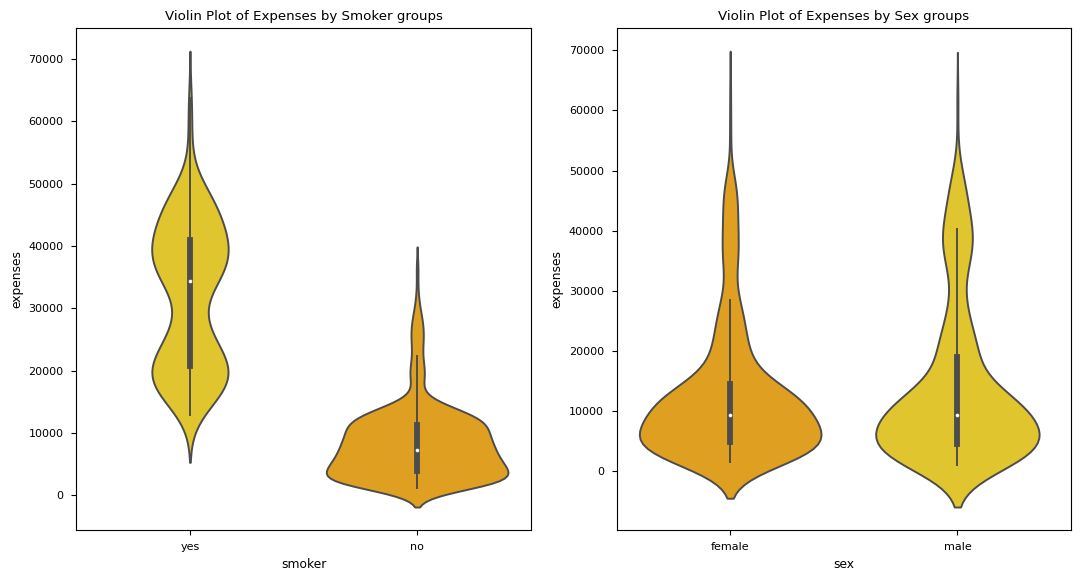

In [38]:
# Create a violin plots of Expenses by Smoker and by Sex, side by side
i = plt.figure(figsize = (11, 6))

ax_a = i.add_subplot(121)
sns.violinplot(x = 'smoker', y = 'expenses', data = coverage, palette = 'Wistia', ax = ax_a)
ax_a.set_title('Violin Plot of Expenses by Smoker groups')

ax_b = i.add_subplot(122)
sns.violinplot(x = 'sex', y = 'expenses', data = coverage, palette = 'Wistia_r', ax = ax_b)
ax_b.set_title('Violin Plot of Expenses by Sex groups')

i.tight_layout()

Text(0.5, 1.0, 'Violin plot of Expenses by Children groups:\n Subcategorized by Sex groups')

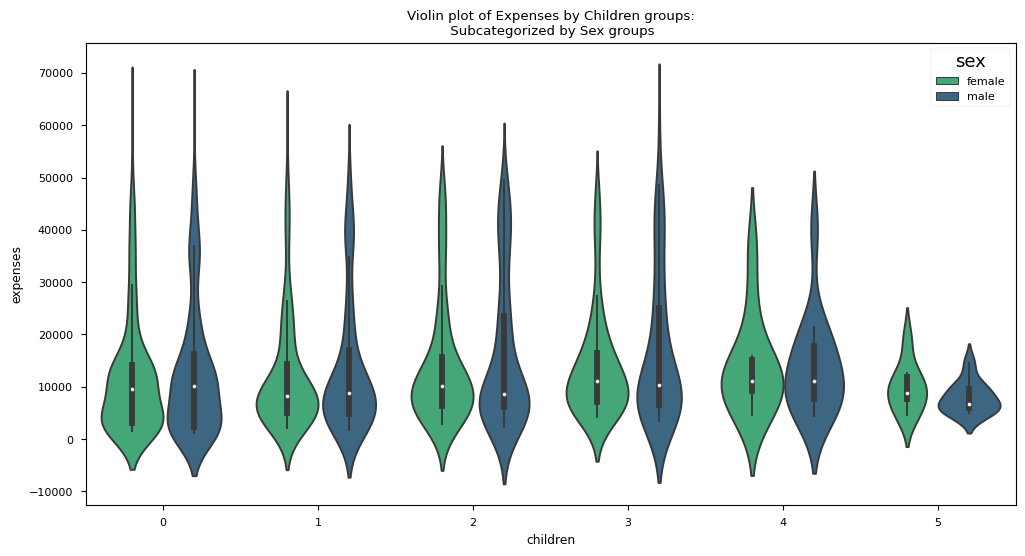

In [42]:
# Violin plot of Expenses vs. Children group, subcategorized by sex groups
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'children', y = 'expenses', data = coverage, hue = 'sex', palette = 'viridis_r')
plt.title('Violin plot of Expenses by Children groups:\n Subcategorized by Sex groups')

Text(0.5, 1.0, 'Violin plot of Expenses by Sex groups:\n Subcategorized by Smoker groups')

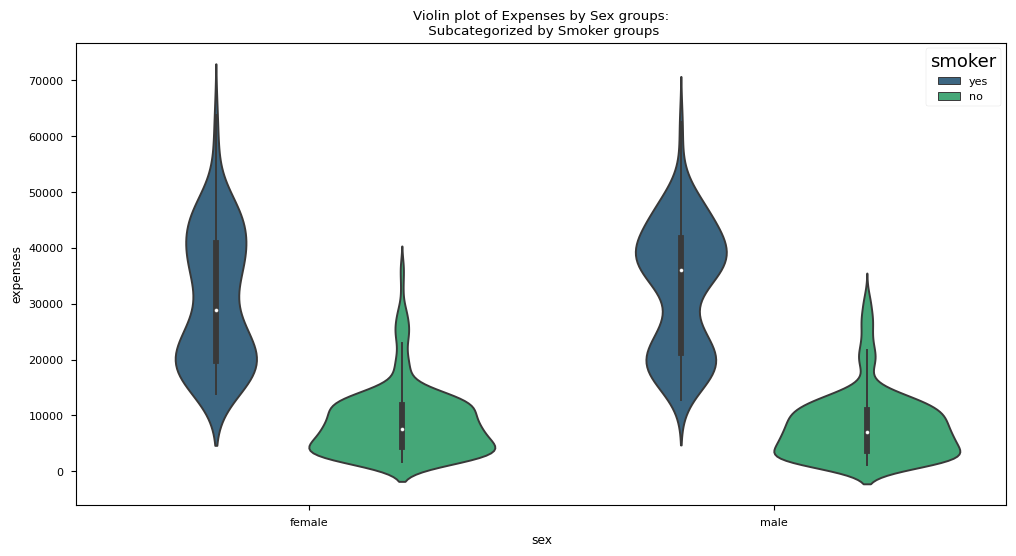

In [43]:
# Violin plot of Expenses vs. Sex group, subcategorized by Smoker groups
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'sex', y = 'expenses', data = coverage, hue = 'smoker', palette = 'viridis')
plt.title('Violin plot of Expenses by Sex groups:\n Subcategorized by Smoker groups')

Text(0.5, 1.0, 'Violin plot of Expenses by Sex groups:\n Subcategorized by Smoker groups; Cut-off = zero')

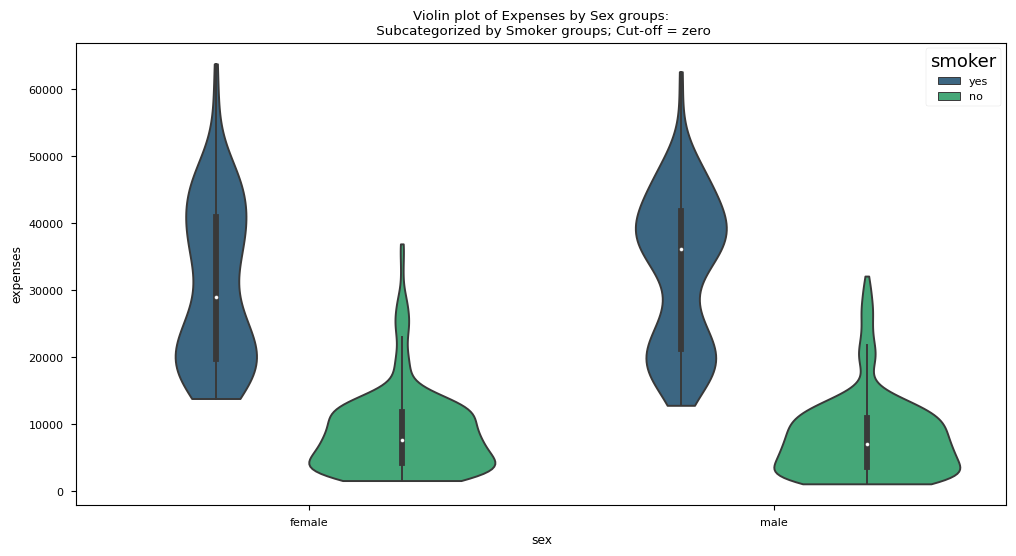

In [44]:
# Insert a cut-point in the latest violin plot, so that there are no negative values on the y-readings
# Violin plot of Expenses vs. Sex group, subcategorized by Smoker groups
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'sex', y = 'expenses', data = coverage, hue = 'smoker', palette = 'viridis', cut = 0)
plt.title('Violin plot of Expenses by Sex groups:\n Subcategorized by Smoker groups; Cut-off = zero')

Text(0.5, 1.0, 'Box plot of Expenses vs. Children: \nSubcategory = Smoker group')

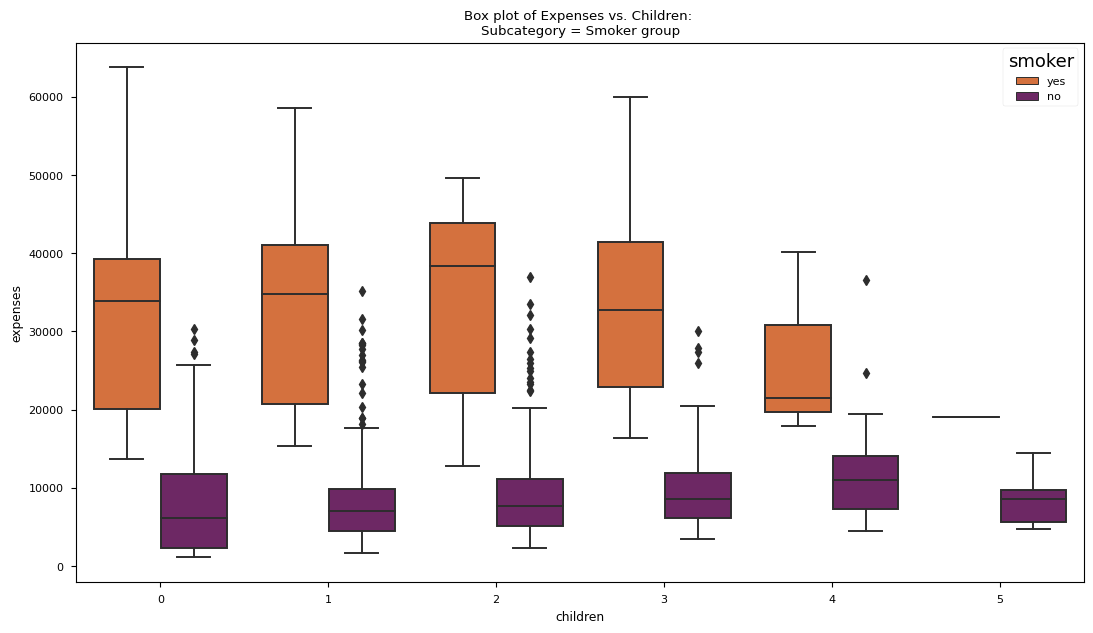

In [45]:
# Construct a box plot of Expenses vs. Children, subcategorized by Smoker group
plt.figure(figsize = (13, 7))
sns.boxplot(x = 'children', y = 'expenses', data = coverage, hue = 'smoker', palette = 'inferno_r')
plt.title('Box plot of Expenses vs. Children: \nSubcategory = Smoker group')

Text(0.5, 1.0, 'Violin plot of Expenses by Region: \nsmoker categories combined onto each violin')

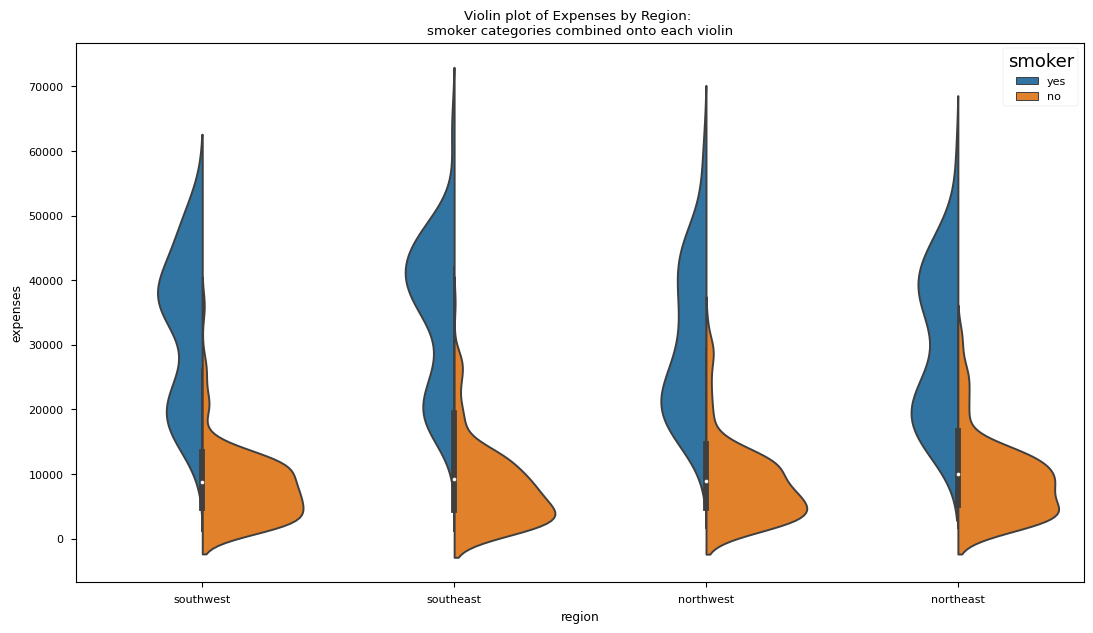

In [47]:
# Create a violin plot of Expenses vs. Region, subdivided into Smoker groups
plt.figure(figsize = (13, 7))
sns.violinplot(x = 'region', y = 'expenses', data = coverage, hue = 'smoker', split = True)
plt.title('Violin plot of Expenses by Region: \nsmoker categories combined onto each violin')

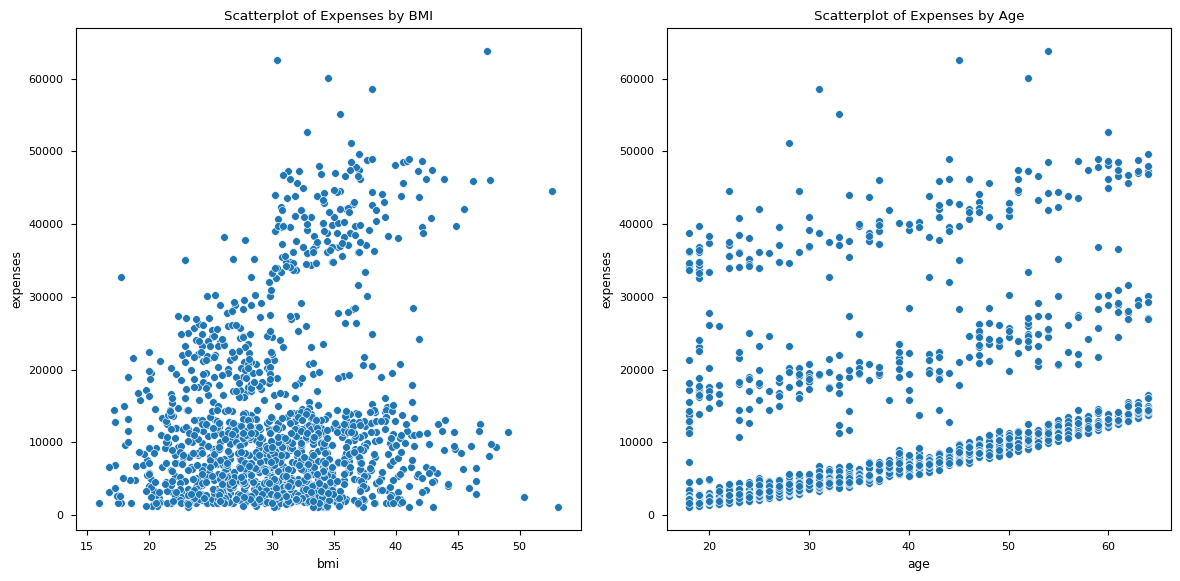

In [54]:
# Create side-by-side scatterplots of Expenses by i) BMI; ii) Age
u = plt.figure(figsize = (12, 6))

axis1 = u.add_subplot(121)
sns.scatterplot(x = 'bmi', y = 'expenses', data = coverage, palette = 'rainbow', ax = axis1)
axis1.set_title('Scatterplot of Expenses by BMI')

axis2 = u.add_subplot(122)
sns.scatterplot(x = 'age', y = 'expenses', data = coverage, palette = 'rainbow', ax = axis2)
axis2.set_title('Scatterplot of Expenses by Age')

u.tight_layout()

In [55]:
coverage.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [56]:
# Dummy-recode the qualitative variables/columns in the data

qual_variables = ['sex', 'children', 'smoker', 'region']
coverage_recode = pd.get_dummies(data = coverage, columns = qual_variables, prefix = 'Dum', prefix_sep = '_', dtype = 'int8', drop_first = True)

In [58]:
# Check the dimensions and the column names in the two data sets
print('There are ' + str(coverage.shape[0]) + ' rows and ' + str(coverage.shape[1]) + ' columns in the original data')
print('\nThe following columns are in the original data: \n', coverage.columns.values)
print('\nThere are ', coverage_recode.shape[0], ' rows and ', coverage_recode.shape[1], ' columns in the new data')
print('\nThe following columns are in the new data: \n' + str(coverage_recode.columns.values))

There are 1338 rows and 7 columns in the original data

The following columns are in the original data: 
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']

There are  1338  rows and  13  columns in the new data

The following columns are in the new data: 
['age' 'bmi' 'expenses' 'Dum_male' 'Dum_1' 'Dum_2' 'Dum_3' 'Dum_4' 'Dum_5'
 'Dum_yes' 'Dum_northwest' 'Dum_southeast' 'Dum_southwest']
